In [68]:
# Customer Churn Prediction means behaviour of customers
# e.g in e-commerce company we will track how many customers are leaving ,why they are leaving and how to resolve it

In [104]:
# Steps
# 1. import dependencies and load dataset
# 2. Exploratory Data Analysis( EDA )
# 3. checking for target column to track imbalance
# 4. Data Visualization of numerical columns
# 5. Data pre-processing
# 6. Splitting train-test data
# 7. SMOTE
# 8. Model training
# 9. Using Random Forest Classifier as it is accurate for this dataset
# 10. Model evaluation ( customer_churn_model + encoders = total 2 pkl file)
# 11. Prediction system using pickle library

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [70]:
customer_data = pd.read_csv('C:/Users/KIIT0001/Desktop/MAHASWETA/ML-INTERNSHIP/Customer_churn_analysis( Bank )/Churn_Modelling.csv')
customer_data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


# Exploratory Data Analysis(EDA)

In [71]:
# dropping some useless columns
customer_data.drop('RowNumber',axis='columns',inplace=True)
customer_data.drop('CustomerId',axis='columns',inplace=True)
customer_data.drop('Surname',axis='columns',inplace=True)

In [72]:
# checking for columns and their data types
customer_data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [73]:
customer_data.shape

(10000, 11)

In [74]:
# basic statistical analysis
customer_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [75]:
# analysing the distribution

In [76]:
print(customer_data["Gender"].unique())

['Female' 'Male']


In [77]:
print(customer_data["Geography"].unique())

['France' 'Spain' 'Germany']


In [78]:
print(customer_data["HasCrCard"].unique())

[1 0]


In [79]:
print(customer_data["IsActiveMember"].unique())

[1 0]


In [80]:
# checking for missing values
customer_data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Checking for the target column

In [81]:
print(customer_data["Exited"].value_counts()) # class imbalance identified in the target, need SMOTE

Exited
0    7963
1    2037
Name: count, dtype: int64


# Feature Analysis - Data Visualization

In [82]:
# Histogram plot for numerical features

In [83]:
def plot_histogram(customer_data, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(customer_data[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = customer_data[column_name].mean()
  col_median = customer_data[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()
  plt.show()

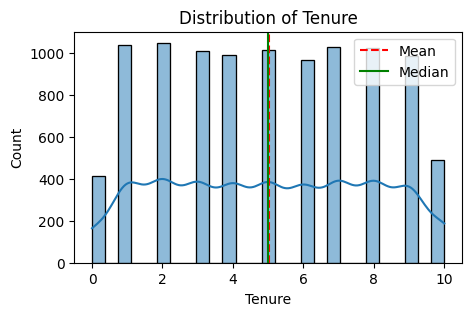

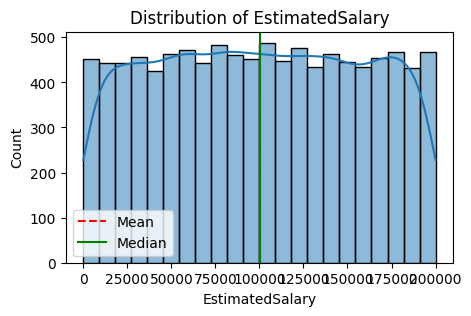

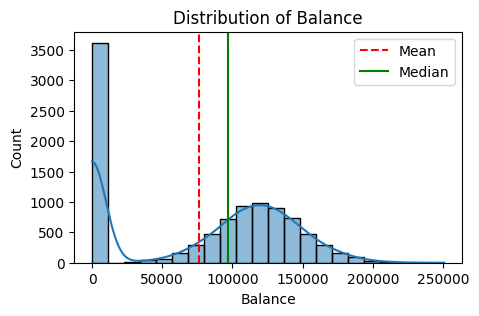

In [84]:
plot_histogram(customer_data, "Tenure")
plot_histogram(customer_data, "EstimatedSalary")
plot_histogram(customer_data, "Balance")

In [85]:
# Box plot for numerical features

In [86]:
def plot_boxplot(customer_data, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=customer_data[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show

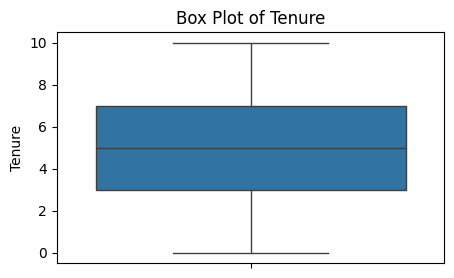

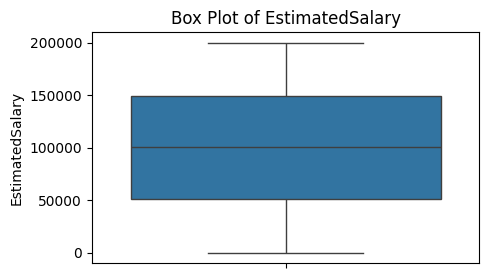

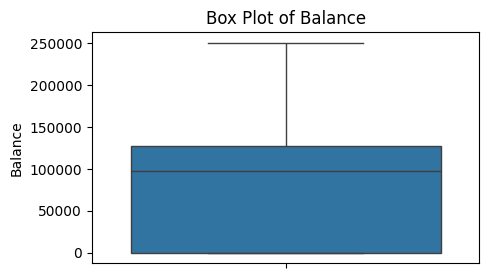

In [87]:
plot_boxplot(customer_data, "Tenure")
plot_boxplot(customer_data, "EstimatedSalary")
plot_boxplot(customer_data, "Balance")

In [88]:
# Correlation heatmap

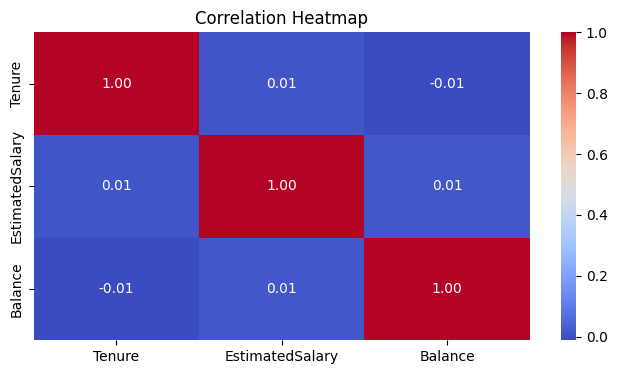

In [89]:
# correlation matrix - heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(customer_data[["Tenure", "EstimatedSalary", "Balance"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [90]:
# Countplot for categorical columns

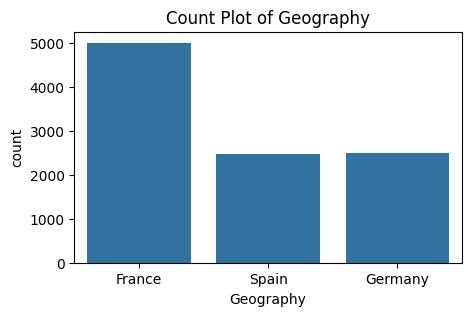

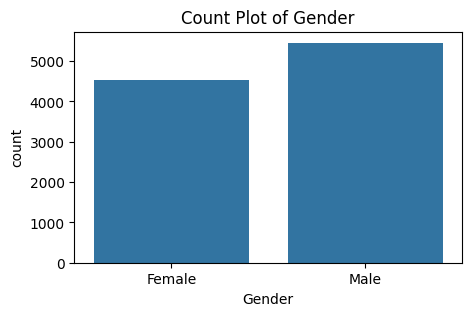

In [91]:
object_cols = customer_data.select_dtypes(include="object").columns.to_list()

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=customer_data[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

# Data pre-processing

In [92]:
# identifying columns with object data type
object_columns = customer_data.select_dtypes(include="object").columns

In [93]:
print(object_columns)

Index(['Geography', 'Gender'], dtype='object')


In [94]:
# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  customer_data[column] = label_encoder.fit_transform(customer_data[column])
  encoders[column] = label_encoder


# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

In [95]:
encoders

{'Geography': LabelEncoder(), 'Gender': LabelEncoder()}

In [41]:
customer_data.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1


# Splitting train-test data

In [42]:
# splitting the features and target
X = customer_data.drop(columns=["Exited"])
y = customer_data["Exited"]

In [43]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
print(y_train.value_counts())

Exited
0    6356
1    1644
Name: count, dtype: int64


# Synthetic Minority Oversampling TEchnique (SMOTE)

In [45]:
# Used to balance datasets with class imbalances by generating synthetic samples for the minority class. 
# This prevents models from being biased toward the majority class and improves their predictive accuracy.

In [46]:
# fixed random state for reproducibility

smote = SMOTE(random_state=42) 

# applying SMOTE to generate synthetic samples for the minority class
# this balances the dataset by oversampling the underrepresented class
# returns a new, balanced training dataset (X_train_smote and y_train_smote)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [47]:
print(y_train_smote.shape)

(12712,)


In [48]:
print(y_train_smote.value_counts())

Exited
0    6356
1    6356
Name: count, dtype: int64


# Model training

In [49]:
# when we want more than one models make models like dictionary

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [50]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.79
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.85
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.86
----------------------------------------------------------------------


In [51]:
# 5-fold cross-validation is a technique to evaluate a machine learning model's performance. 
# It splits the dataset into 5 equal parts (folds), trains the model on 4 folds, and tests it on the remaining fold. 
# This process repeats 5 times, ensuring each fold is used for testing once. 
# The final accuracy is the average across all runs, making the model more reliable by reducing bias.

In [52]:
cv_scores

{'Decision Tree': array([0.72316162, 0.79276445, 0.81549961, 0.80802518, 0.8202203 ]),
 'Random Forest': array([0.75776642, 0.85922139, 0.88552321, 0.87844217, 0.89299764]),
 'XGBoost': array([0.76956351, 0.85292961, 0.89889851, 0.87332809, 0.88670338])}

# Random Forest Classifier

In [ ]:
# Random Forest gives the highest accuracy compared to other models with default parameters

In [54]:
rfc = RandomForestClassifier(random_state=42)

In [55]:
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [56]:
print(y_test.value_counts())

Exited
0    1607
1     393
Name: count, dtype: int64


# Model Evaluation

In [58]:
# evaluate on test data
y_test_pred = rfc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confsuion Matrix:\n", confusion_matrix(y_test, y_test_pred)) # confusion matrix provides a breakdown of correct and incorrect predictions
print("Classification Report:\n", classification_report(y_test, y_test_pred)) # classification report, which includes precision, recall, and F1-score for each class

Accuracy Score:
 0.825
Confsuion Matrix:
 [[1394  213]
 [ 137  256]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      1607
           1       0.55      0.65      0.59       393

    accuracy                           0.82      2000
   macro avg       0.73      0.76      0.74      2000
weighted avg       0.84      0.82      0.83      2000



In [96]:
# save the trained model as a pickle file
model_data = {"model": rfc, "features_names": X.columns.tolist()}


with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

# Prediction System

In [97]:
# Load the saved model and build a Predictive System

In [98]:
with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

In [99]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [100]:
print(feature_names)

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [101]:
input_data = {
    'CreditScore': 684,
    'Geography': 'France',
    'Gender': 'Male',
    'Age': 27,
    'Tenure': 2,
    'Balance': 134603.88,
    'NumOfProducts': 1,
    'HasCrCard': 1,
    'IsActiveMember': 1,
    'EstimatedSalary': 71725.73
}

input_data_df = pd.DataFrame([input_data]) # converting the dictionary to dataframe

with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)


# encode categorical featires using the saved encoders
for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

# make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

[0]
Prediction: No Churn
Prediciton Probability: [[0.95 0.05]]
